In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Loan_default.csv')

In [3]:
df.shape


(255347, 18)

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [8]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


In [9]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

(Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
        'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
       dtype='object'),
 Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
        'HasDependents', 'LoanPurpose', 'HasCoSigner'],
       dtype='object'))

In [11]:
df['Default'].value_counts()

,count
Default,
0,225694
1,29653


In [12]:
df['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.883872
1,0.116128


In [13]:
df['Default'].unique()

array([0, 1])

In [14]:
df = df.drop(columns=['LoanID'])

In [15]:
df.select_dtypes(include='object').columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

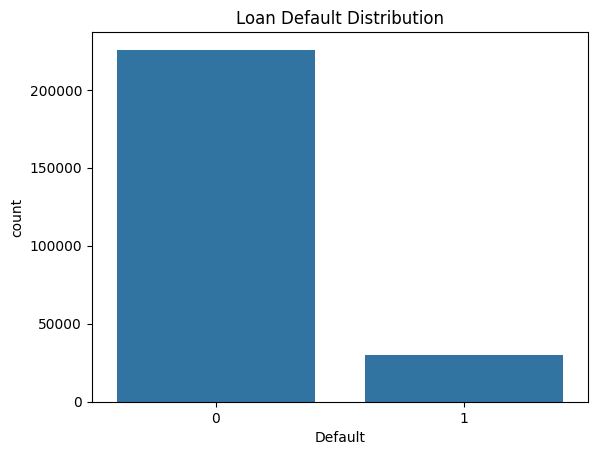

In [16]:
plt.figure()
sns.countplot(x='Default', data=df)
plt.title('Loan Default Distribution')
plt.show()

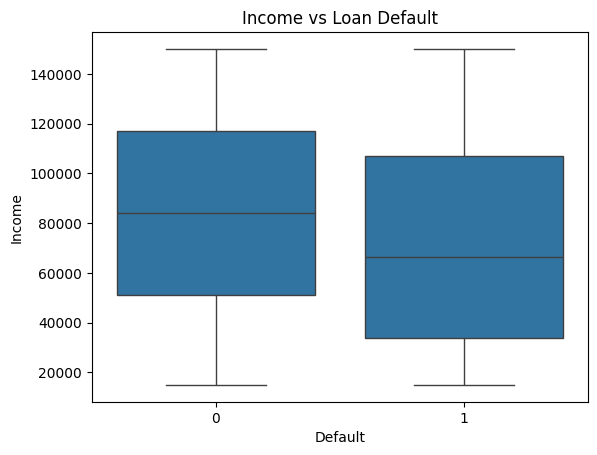

In [17]:
plt.figure()
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Income vs Loan Default')
plt.show()

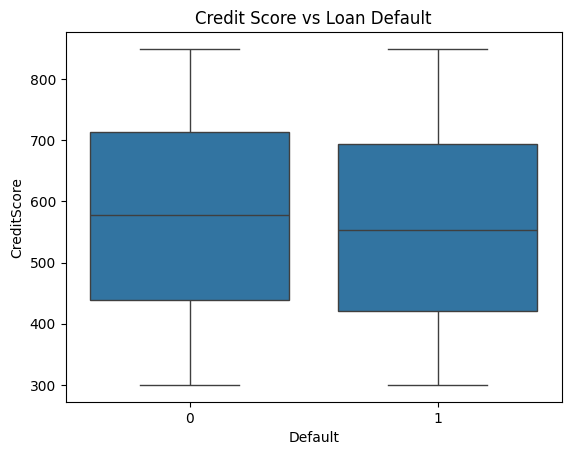

In [18]:
plt.figure()
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title('Credit Score vs Loan Default')
plt.show()

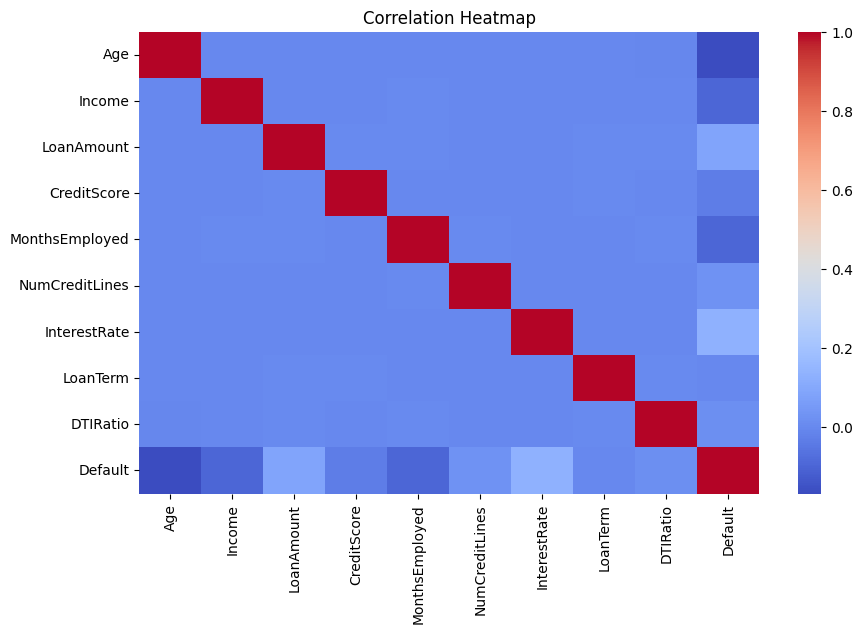

In [19]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df['Income_to_Loan_Ratio'] = df['Income'] / df['LoanAmount']

In [21]:
df.select_dtypes(include='object').columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [22]:
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [23]:
df[binary_cols].head()

,HasMortgage,HasDependents,HasCoSigner
0,1,1,1
1,0,0,1
2,1,1,0
3,0,0,0
4,0,1,0


In [24]:
df = pd.get_dummies(
    df,
    columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'],
    drop_first=True
)

In [25]:
df.shape
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,False,False,False,True,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,False,True,False,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,False,False,False,True,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,False,False,False,False,False,False


In [26]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [27]:
X = df.drop('Default', axis=1)
y = df['Default']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30448 14691]
 [ 1783  4148]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.79     45139
           1       0.22      0.70      0.33      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070



In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [33]:
y_pred_dt = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[29920 15219]
 [ 1906  4025]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     45139
           1       0.21      0.68      0.32      5931

    accuracy                           0.66     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.86      0.66      0.72     51070



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[33857 11282]
 [ 2232  3699]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.83     45139
           1       0.25      0.62      0.35      5931

    accuracy                           0.74     51070
   macro avg       0.59      0.69      0.59     51070
weighted avg       0.86      0.74      0.78     51070



In [36]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)

,0
Age,0.264456
InterestRate,0.177416
Income_to_Loan_Ratio,0.155411
MonthsEmployed,0.101793
Income,0.092714
LoanAmount,0.061865
CreditScore,0.037550
DTIRatio,0.025057
NumCreditLines,0.010553
HasCoSigner,0.010488
